**Η Εργασία εκπονήθηκε από τους:**

*   Δημήτριος Χρυσός (ΑΜ: 1115202100275)
*   Αναστάσιος Μουμουλίδης (ΑΜ: 1115202100108)

# **Mount Drive**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Train_2019**

## **Create the train files**

### Import libraries

In [4]:
# Import libraries
import pandas as pd
import sys
import matplotlib.pyplot as plt

wanted_columns = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood',
          'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
          'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'city', 'cancellation_policy',
          'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365', 'minimum_nights']

### Create the data from listings.csv for every month

In [5]:
####### febrouary - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/febrouary/listings.csv"
df1 = pd.read_csv(path, encoding='utf-8', engine='python')
for column in df1.columns:  # keep only the wanted columns
  if column not in wanted_columns:
    df1.drop(column, axis=1, inplace=True)
df1['month'] = 'Febrouary'  # add the month as a column

####### march - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/march/listings.csv"
df2 = pd.read_csv(path, encoding='utf-8', engine='python')
for column in df2.columns:  # keep only the wanted columns
  if column not in wanted_columns:
    df2.drop(column, axis=1, inplace=True)
df2['month'] = 'Μarch'  # add the month as a column
df12 = pd.concat([df1,df2])

####### april - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/april/listings.csv"
df3 = pd.read_csv(path, encoding='utf-8', engine='python')
for column in df3.columns:  # keep only the wanted columns
  if column not in wanted_columns:
    df3.drop(column, axis=1, inplace=True)
df3['month'] = 'April'  # add the month as a column
df = pd.concat([df12,df3])
df

,id,name,description,transit,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,city,...,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,month
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$71.00,1,294,17,2011-05-20,2019-01-12,96.0,t,strict_14_with_grace_period,Febrouary
1,10988,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$82.00,1,0,31,2012-10-21,2017-11-23,92.0,t,strict_14_with_grace_period,Febrouary
2,10990,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$47.00,1,282,27,2012-09-06,2019-02-01,97.0,t,strict_14_with_grace_period,Febrouary
3,10993,"Studio, metro, cable tv, wi-fi, etc",The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$37.00,1,286,42,2012-09-24,2019-02-02,97.0,t,strict_14_with_grace_period,Febrouary
4,10995,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$47.00,2,308,16,2010-07-08,2019-01-11,95.0,t,strict_14_with_grace_period,Febrouary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9656,33819692,Lysicrates Monument - Athens 33,"""Athens 33"" is a newly renovated building in N...",NaN,2014-05-09,100%,t,t,NaN,Athina,...,$90.00,2,260,0,NaN,NaN,NaN,t,flexible,April
9657,33820145,Bright and Stylish Exarchia apartment,"Newly renovated, this two bedroom apartment is...",Omonia metro station is 600 m away from the ap...,2019-04-12,NaN,t,f,NaN,Athina,...,$50.00,2,263,0,NaN,NaN,NaN,t,moderate,April
9658,33821757,Athens21,Athens 21 is centrally located right next to M...,NaN,2019-04-12,NaN,t,f,NaN,Athina,...,$200.00,1,86,0,NaN,NaN,NaN,t,flexible,April
9659,33821833,Tower of Winds,"""Athens 33"" is a newly renovated building in N...",NaN,2014-05-09,100%,t,t,NaN,Athens,...,$90.00,2,260,0,NaN,NaN,NaN,t,flexible,April


### Find how many NaN values does it's column have and save them

In [6]:
nan_col = []
for column in df.columns:
  number = df[column].isnull().sum()
  if number == 0: continue # skip the columns with 0 NaN values
  print(column, ":" ,number)
  nan_col.append((column,number))

name : 30
description : 289
transit : 8910
host_since : 2
host_response_rate : 5055
host_has_profile_pic : 2
host_identity_verified : 2
neighbourhood : 261
city : 9
zipcode : 918
bedrooms : 12
beds : 31
first_review : 6722
last_review : 6722
review_scores_rating : 6917


### For the columns with a small amount of NaN values, drop those NaN rows

In [7]:
# save the columns with a small amount of NaN values
small_columns = []
for i in nan_col:
  column = i[0]
  amount = i[1]
  if amount <= 1000:
    small_columns.append(column)

# for the columns with a small amount of NaN values, drop those NaN rows
for column in df.columns:
  if column not in small_columns: continue
  df = df.drop(df[df[column].isnull()].index)

### Managing missing data & excessive values

In [9]:
# find how many NaN values it's column has and save them
train = df.copy()
nan_col = []
for column in train.columns:
  number = train[column].isnull().sum()
  if number == 0: continue # skip the columns with 0 NaN values
  print(column, ":" ,number)
  nan_col.append((column,number))

transit : 7292
host_response_rate : 4175
first_review : 5673
last_review : 5673
review_scores_rating : 5840


In [10]:
# Replace NaN values

# for 'transit' nan values:
train['transit'] = train['transit'].fillna("No transit information available")

# for 'host_response_rate' nan values:
not_nan = train[~train['host_response_rate'].isna()]
average = not_nan['host_response_rate'].replace('[\%]', '', regex=True).astype(float)
average = round(average.mean())
average = str(average)
average = average + "%"
train['host_response_rate'] = train['host_response_rate'].fillna(average)

# for 'first_review' and 'last_review' nan values:
train['first_review'] = train['first_review'].fillna("No reviews available")
train['last_review'] = train['last_review'].fillna("No reviews available")

# for 'review_scores_rating' nan values:
not_nan = train[~train['review_scores_rating'].isna()]
average = not_nan['review_scores_rating'].astype(float)
average = round(average.mean(), 0)
average = str(average)
train['review_scores_rating'] = train['review_scores_rating'].fillna(average)

In [11]:
# Remove rows with excessive values

# for 'bedrooms':
average = train.bedrooms.mean()
excessive = train[train['bedrooms'] >= 10]
train = train.drop(excessive.bedrooms.index)

# for 'beds':
average = train.beds.mean()
excessive = train[train['beds'] >= 20]
train = train.drop(excessive.beds.index)

# for 'bathrooms':
average = train.bathrooms.mean()
excessive = train[train['bathrooms'] >= 7]
train = train.drop(excessive.bathrooms.index)

# for 'accommodates':
average = train.accommodates.mean()
excessive = train[train['accommodates'] > 20]
train = train.drop(excessive.accommodates.index)

# for 'price':
average = train.price.replace('[\$\,\.]', '', regex=True).astype(float) / 100
average = average.mean()
excessive = train[(train.price.replace('[\$\,\.]', '', regex=True).astype(float) / 100) > 1000]
train = train.drop(excessive.price.index)

# for 'minimum_nights':
average = train.minimum_nights.mean()
excessive = train[train['minimum_nights'] > 150]
train = train.drop(excessive.minimum_nights.index)

### Create the train file and the dataframe we are going to be using

In [12]:
train.to_csv("train_2019.csv", index=False, encoding='utf-8')

train_2019 = pd.read_csv("/content/train_2019.csv", encoding='utf-8', engine='python')
train_2019

,id,name,description,transit,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,city,...,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,month
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$71.00,1,294,17,2011-05-20,2019-01-12,96.0,t,strict_14_with_grace_period,Febrouary
1,10988,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$82.00,1,0,31,2012-10-21,2017-11-23,92.0,t,strict_14_with_grace_period,Febrouary
2,10990,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$47.00,1,282,27,2012-09-06,2019-02-01,97.0,t,strict_14_with_grace_period,Febrouary
3,10993,"Studio, metro, cable tv, wi-fi, etc",The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$37.00,1,286,42,2012-09-24,2019-02-02,97.0,t,strict_14_with_grace_period,Febrouary
4,10995,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$47.00,2,308,16,2010-07-08,2019-01-11,95.0,t,strict_14_with_grace_period,Febrouary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,33796162,Central & Comfy 1BD Apartment in Plaka,Explore the heart of Athens via this comfortab...,Metro / Underground is the most convenient mea...,2014-08-16,100%,t,f,Attiki,Athina,...,$70.00,1,131,0,No reviews available,No reviews available,95.0,t,moderate,April
23687,33796363,Very central meters to Acropolis,Beautiful small space in Acropolis,No transit information available,2018-12-23,100%,t,f,Koukaki,Athina,...,$30.00,2,351,0,No reviews available,No reviews available,95.0,t,flexible,April
23688,33799363,BEAUTYFULL ROOM,GALATSI PLACE IS A VERY NICE PLACE CLEAR PLAC...,No transit information available,2019-04-11,96%,t,f,Rizoupoli,Galatsi,...,$20.00,1,364,0,No reviews available,No reviews available,95.0,t,flexible,April
23689,33802451,The Philosopher's hut,Luxury and cozy apartment in the most prestigi...,The historic center with all the archeological...,2017-05-25,100%,t,f,Psyri,Athina,...,$100.00,2,330,0,No reviews available,No reviews available,95.0,t,flexible,April




##    **1.1**



In [13]:
temp = train_2019.copy()

types = {}
for type in temp.room_type:
  if type in types:
    types[type] += 1
  else:
    types[type] = 1

most_common = max(types, key=types.get)
print("Most common room type:", most_common)

Most common room type: Entire home/apt




##    **1.2**



In [14]:
grouped_price = train_2019.copy()

grouped_price['price'] = grouped_price['price'].replace('[\$\,\.]', '', regex=True).astype(float)
grouped_price.price = grouped_price.price/100
grouped_price = grouped_price.groupby('month', sort=False)['price'].mean()
grouped_price

month
Febrouary    61.491295
Μarch        61.104589
April        60.805120
Name: price, dtype: float64

<Axes: xlabel='Months', ylabel='Average Price'>

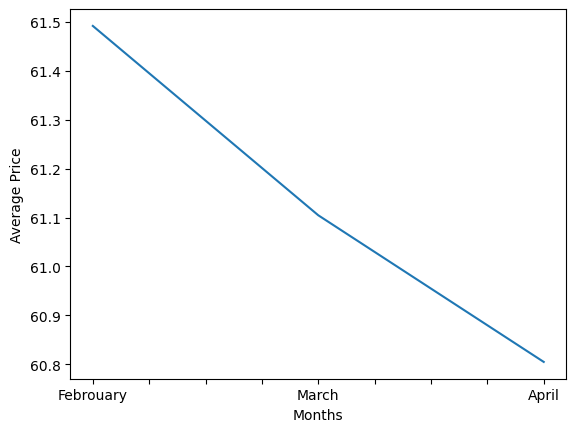

In [15]:
grouped_price.plot(xlabel = 'Months', ylabel = 'Average Price')



##    **1.3**



In [18]:
grouped_neigh = train_2019.copy()
grouped_neigh = grouped_neigh.groupby('neighbourhood')['number_of_reviews'].sum()
grouped_neigh

neighbourhood
Agios Loukas           2065
Agios Nikolaos        10587
Akadimia Platonos      3278
Ambelokipi            28943
Attiki                15370
Exarcheia             32060
Gazi                   8824
Goudi                  1219
Ilisia                 5988
Kerameikos            24860
Kolonaki              34841
Kolonos               12335
Koukaki               75460
Kypseli                9399
Larissis              34442
Metaxourgeio          36229
Mets                  28776
Monastiraki            2146
Neapoli               11808
Neos Kosmos           70440
Pangrati              35115
Patisia               10980
Pedion Areos          12343
Petralona             14354
Plaka                113760
Profitis Daniil         905
Psyri                 44363
Rizoupoli               722
Rouf                     64
Sepolia                 791
Thiseio               15907
Votanikos              4126
Name: number_of_reviews, dtype: int64

In [19]:
neigh = grouped_neigh.nlargest(5).index
for i in neigh:
  print(i)

Plaka
Koukaki
Neos Kosmos
Psyri
Metaxourgeio




##    **1.4**



In [20]:
neigh = train_2019.copy()
neigh = neigh[neigh["room_type"] == 'Entire home/apt']
neigh = neigh.drop_duplicates(subset=['id'])
neigh = neigh.groupby('neighbourhood')['id'].count()
neigh

neighbourhood
Agios Loukas           60
Agios Nikolaos        185
Akadimia Platonos      23
Ambelokipi            510
Attiki                233
Exarcheia             377
Gazi                  141
Goudi                  24
Ilisia                166
Kerameikos             88
Kolonaki              537
Kolonos               119
Koukaki               757
Kypseli               187
Larissis              434
Metaxourgeio          387
Mets                  292
Monastiraki            28
Neapoli               253
Neos Kosmos           798
Pangrati              541
Patisia               212
Pedion Areos          253
Petralona             230
Plaka                1002
Profitis Daniil        12
Psyri                 413
Rizoupoli              15
Rouf                    4
Sepolia                35
Thiseio               275
Votanikos              51
Name: id, dtype: int64

In [21]:
neigh.idxmax()

'Plaka'

## **1.5 - 1.6**

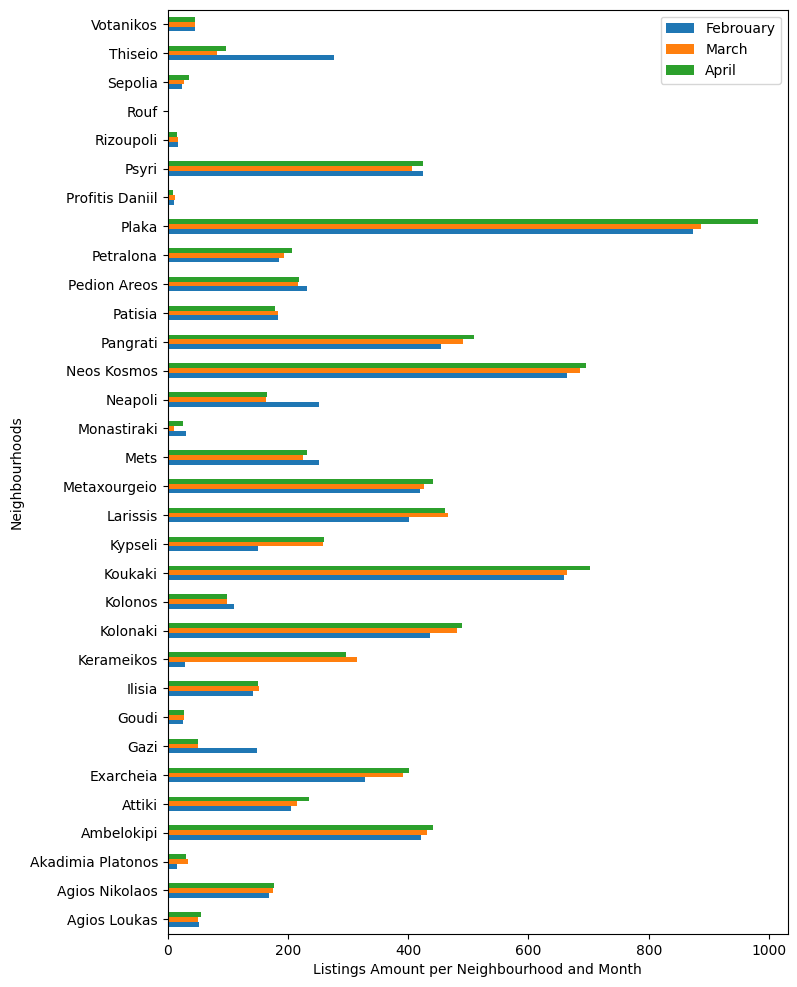

In [22]:
# per month - neighbourhood
month_neigh = train_2019.copy()
month_neigh = month_neigh.groupby(['month', 'neighbourhood'], as_index=False)['id'].count()
month_neigh.columns = ['month', 'neighbourhood', 'count']

# for months amounts
febrouary = []
for index, row in month_neigh.iterrows():
  if row['month'] == "Febrouary": febrouary.append(row['count'])

march = []
for index, row in month_neigh.iterrows():
  if row['month'] == "Μarch": march.append(row['count'])

april = []
for index, row in month_neigh.iterrows():
  if row['month'] == "April": april.append(row['count'])

# for index
month_neigh = train_2019.copy()
index =  list(month_neigh.neighbourhood.unique()) # for index
index = sorted(index)

month_neigh_plot = pd.DataFrame({'Febrouary': febrouary, 'Μarch': march, 'April': april}, index=index)
mn_plot = month_neigh_plot.plot.barh(figsize=(8, 12), ylabel = 'Neighbourhoods', xlabel = 'Listings Amount per Neighbourhood and Month')



##    **1.7**



In [23]:
neigh = train_2019.copy()
neigh = neigh.drop_duplicates(subset=['id'])
neigh = neigh.groupby('neighbourhood')['room_type'].apply(pd.Series.mode)
neigh = neigh.droplevel(level=1)
neigh

neighbourhood
Agios Loukas         Entire home/apt
Agios Nikolaos       Entire home/apt
Akadimia Platonos    Entire home/apt
Ambelokipi           Entire home/apt
Attiki               Entire home/apt
Exarcheia            Entire home/apt
Gazi                 Entire home/apt
Goudi                Entire home/apt
Ilisia               Entire home/apt
Kerameikos           Entire home/apt
Kolonaki             Entire home/apt
Kolonos              Entire home/apt
Koukaki              Entire home/apt
Kypseli              Entire home/apt
Larissis             Entire home/apt
Metaxourgeio         Entire home/apt
Mets                 Entire home/apt
Monastiraki          Entire home/apt
Neapoli              Entire home/apt
Neos Kosmos          Entire home/apt
Pangrati             Entire home/apt
Patisia              Entire home/apt
Pedion Areos         Entire home/apt
Petralona            Entire home/apt
Plaka                Entire home/apt
Profitis Daniil      Entire home/apt
Psyri                Ent



##    **1.8**



In [24]:
room = train_2019.copy()
room['price'] = room['price'].replace('[\$\,\.]', '', regex=True).astype(float)
room.price = room.price/100
room = room.groupby('room_type')['price'].mean()
room

room_type
Entire home/apt    61.924568
Private room       55.968645
Shared room        37.042017
Name: price, dtype: float64

In [25]:
room.idxmax()

'Entire home/apt'



##    **1.9**



In [26]:
!pip install folium

In [27]:
import folium
from folium import plugins

In [28]:
data = train_2019.copy()
coords = data[['latitude', 'longitude']]

# for 300 random rows, of the coords dataframe
coords = coords.sample(n=300)
coords

,latitude,longitude
9630,37.969540,23.730250
21310,37.988240,23.735650
7572,37.968802,23.725158
3786,38.015665,23.730752
6085,37.974567,23.732144
...,...,...
21722,37.975200,23.731730
13983,37.982570,23.723710
5488,37.969175,23.743612
21755,37.980230,23.715800


In [30]:
map = folium.Map(location=[coords.iloc[0]['latitude'], coords.iloc[0]['longitude']])

for index, row in coords.iterrows():
  value = data.iloc[index, df.columns.get_loc('room_type')]
  folium.Marker(location=[row['latitude'], row['longitude']], popup=f"Room type: {value}").add_to(map)

map



##    **1.10**



In [31]:
from wordcloud import WordCloud

In [32]:
####### febrouary - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/febrouary/reviews.csv"
dfa = pd.read_csv(path, encoding='utf-8', engine='python')
dfa['month'] = 'Febrouary'


####### march - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/march/reviews.csv"
dfb = pd.read_csv(path, encoding='utf-8', engine='python')
dfb['month'] = 'Μarch'
dfab = pd.concat([dfa,dfb])


####### april - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/april/reviews.csv"
dfc = pd.read_csv(path, encoding='utf-8', engine='python')
dfc['month'] = 'April'
df_tonos = pd.concat([dfab,dfc])

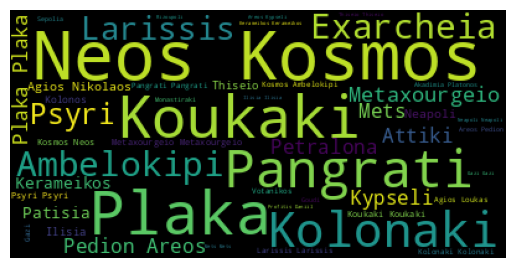

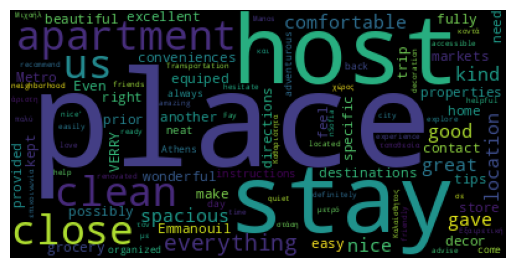

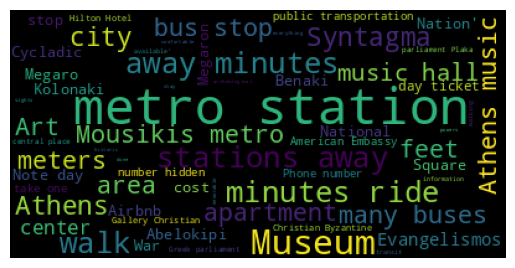

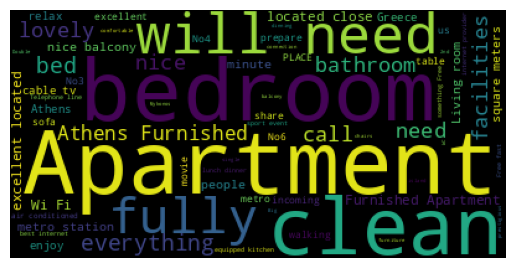

In [33]:
neighbourhood = train_2019.copy()
text = ' '.join(neighbourhood['neighbourhood'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

last_review = df_tonos.copy()
text = last_review['comments'].values
wordcloud2 = WordCloud().generate(str(text))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

transit = train_2019.copy()
text = transit['transit'].values
wordcloud3 = WordCloud().generate(str(text))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

description = train_2019.copy()
text = description['description'].values
wordcloud4 = WordCloud().generate(str(text))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()



##    **1.11**



In [34]:
# find each individual value of the amenities column
am = train_2019.copy()
values = am.amenities.copy()

values = values.replace('[\{\}\"]','', regex=True).astype(str)

amen = pd.DataFrame(values)
rows = amen.explode('amenities')
rows = rows['amenities'].str.strip("{}")
rows = rows.str.split(",")

ind_values = []
for row in rows:
  for item in row:
    if item not in ind_values:
      ind_values.append(item)

for i in ind_values:
  print(i)

TV
Cable TV
Internet
Wifi
Air conditioning
Kitchen
Elevator
Buzzer/wireless intercom
Heating
Family/kid friendly
Washer
Dryer
First aid kit
Safety card
Fire extinguisher
Essentials
Shampoo
24-hour check-in
Hangers
Hair dryer
Iron
Laptop friendly workspace
Hot water
Bed linens
Extra pillows and blankets
Ethernet connection
Microwave
Coffee maker
Refrigerator
Dishwasher
Dishes and silverware
Cooking basics
Oven
Stove
Patio or balcony
Luggage dropoff allowed
Host greets you
High chair
Pack ’n Play/travel crib
Bathtub
Long term stays allowed
Smoke detector
Carbon monoxide detector
Paid parking off premises
Room-darkening shades
Wide doorway
Step-free access
Wide clearance to bed
Breakfast
Free street parking
Pocket wifi
Cleaning before checkout
Accessible-height bed
Other
Handheld shower head
Smoking allowed
Lock on bedroom door
translation missing: en.hosting_amenity_49
translation missing: en.hosting_amenity_50
Self check-in
Lockbox
Children’s books and toys
Crib
Pets allowed
Hot tub
Wid

In [35]:
# Make the amenities categoties

# amenities categoties: kitchen, accesibility, electricity_and_technology, facilities, bathroom, kids_friendly, security, services
kitchen = ["Kitchen", "Microwave", "Coffee maker", "Refrigerator", "Dishwasher", "Dishes and silverware", "Cooking basics", "Oven", "Stove", "Full kitchen", "Convection oven", "Hot water kettle", "Mini fridge", "Breakfast table",
           "Espresso machine", "Formal dining area", "Double oven", "Roll-in shower", "Kitchenette", "Wine cooler", "Steam oven", "Gas oven", "Freezer"]
accesibility = ["Elevator", "Step-free access", "Wide clearance to bed", "Accessible-height bed", "Wide hallway clearance", "Flat path to front door", "Well-lit path to entrance", "Accessible-height toilet", "Wide clearance to shower",
                "Wide entryway", "Wheelchair accessible", "Single level home", "Fixed grab bars for shower", "Disabled parking spot", "Bathtub with bath chair", "Fixed grab bars for toilet", "Shower chair", "Ground floor access"]
electricity_and_technology = ["TV", "Cable TV", "Internet", "Wifi", "Air conditioning", "Buzzer/wireless intercom", "Hair dryer", "Ethernet connection", "Game console", "DVD player", "EV charger", "Keypad", "Smart lock", "Smart TV",
                              "Sound system", "High-resolution computer monitor", "Printer", "Fax machine", "Projector and screen", "Air purifier", "Amazon Echo", "Warming drawer", "Heat lamps", "Ironing Board", "Electric profiling bed",
                              "Laptop friendly workspace", "Iron"]
facilities = ["Heating", "Washer", "Dryer", "Hangers", "Bed linens", "Extra pillows and blankets", "Patio or balcony", "High chair", "Room-darkening shades", "Wide doorway", "Pocket wifi", "Other",
              "Indoor fireplace", "BBQ grill", "Washer / Dryer", "Private entrance", "Garden or backyard", "Private living room", "Fire pit", "Bedroom comforts", "Beach essentials", "Changing table", "Firm mattress", "Terrace",
              "Memory foam mattress", "Murphy bed", "Outdoor seating", "Pillow-top mattress", "Pool", "Mudroom", "Beachfront", "Central air conditioning", "Day bed", "Standing valet", "Waterfront", "Heated floors", "Ceiling fan",
              "Sun loungers", "Beach view", "Hammock", "Private pool", "Private hot tub", "Sauna", "Hot water", "Balcony"]
bathroom = ["Shampoo", "Bathtub", "Handheld shower head", "Hot tub", "Body soap", "Bath towel", "Toilet paper", "Walk-in shower", "Bathroom essentials", "Rain shower", "Soaking tub", "En suite bathroom", "Bidet", "Heated towel rack",
            "Private bathroom", "Alfresco bathtub", "Stand alone steam shower", "Touchless faucets", "Jetted tub"]
kids_pets_friendly = ["Family/kid friendly", "Children’s books and toys", "Pets allowed", "toilet", " toilet", "Pets live on this property", "Dog(s)", "Cat(s)", "Children’s dinnerware", "Baby monitor", "Outlet covers",
                      "Baby bath", "Babysitter recommendations", "Table corner guards", "Other pet(s)", "Pack ’n Play/travel crib", "Crib"]
security = ["First aid kit", "Safety card", "Fire extinguisher", "Smoke detector", "Carbon monoxide detector", "Lock on bedroom door", "Lockbox", "Window guards", "Stair gates", "Fireplace guards"]
services = ["Essentials", "24-hour check-in", "Luggage dropoff allowed", "Host greets you", "Long term stays allowed", "Paid parking off premises", "Breakfast", "Free street parking", "Cleaning before checkout", "Smoking allowed", "Self check-in",
            "Free parking on premises", "Doorman", "Building staff", "Suitable for events", "Paid parking on premises", "Gym", "Mountain view", "Exercise equipment", "Ski-in/Ski-out", "Netflix", "Outdoor parking", "Shared gym",
            "HBO GO", "Lake access"]

# function to find in which category an item belongs
def in_category(item):
  # print(item)
  if item in kitchen: return "kitchen"
  elif item in accesibility: return "accesibility"
  elif item in electricity_and_technology: return "electricity_and_technology"
  elif item in facilities: return "facilities"
  elif item in bathroom: return "bathroom"
  elif item in kids_pets_friendly: return "kids_pets_friendly"
  elif item in security: return "security"
  elif item in services: return "services"
  else: return "no category"

In [36]:
# replace the various amenities values with the categories
am = train_2019.copy()
for index, row in am.iterrows():
  temp_string = ""
  temp_row = row['amenities']
  temp_row = temp_row.replace("[", "").replace("]", "").replace('"','')
  temp_row = temp_row.split(",")
  for item in temp_row:
    item = item.strip()
    item = item.replace("{", "").replace("}", "")
    category = in_category(item)
    if category == "no category":
      if "translation missing" in item: pass  # skip translation missing
      else: print(item)    # for debugging purposes
    else:
      if category not in temp_string:
        if temp_string == "": temp_string = category
        else: temp_string += ", " + category
  train_2019.loc[index, 'amenities'] = temp_string

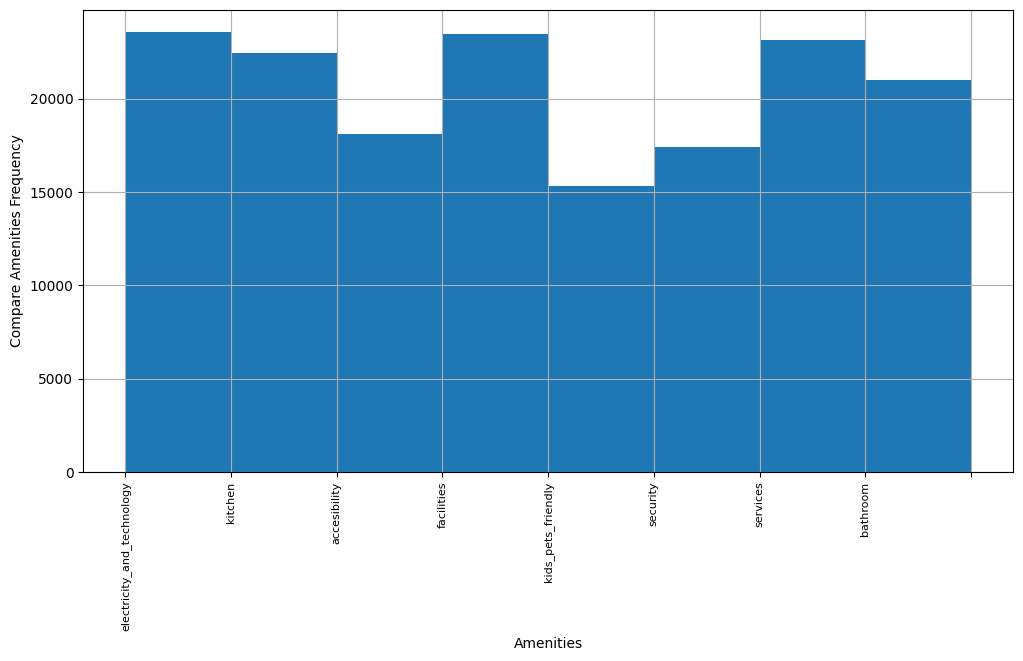

In [37]:
# make the histogram out of the amenities column
ameni = train_2019.copy()
ameni.amenities = ameni.amenities.str.split(",")

for i in range(len(ameni.amenities)):
  for j in range(len(ameni.amenities[i])):
    ameni.amenities[i][j] = ameni.amenities[i][j].strip()

ameni = ameni.explode('amenities')
plt.figure(figsize=(12, 6))
ameni.amenities.hist(bins=8)  # numbers of different categories = 8
plt.gca()
plt.xlabel('Amenities', fontsize=10)
plt.ylabel('Compare Amenities Frequency', fontsize=10)
plt.xticks(fontsize=8, rotation=90)
plt.show()



##    **1.12**



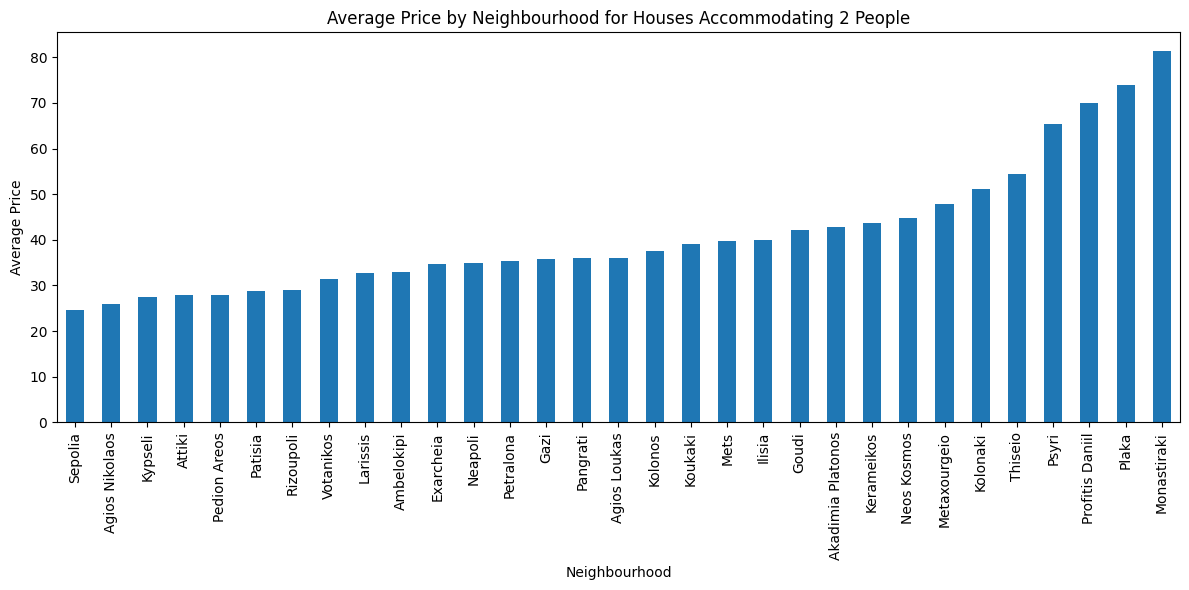

,average_price,category
neighbourhood,,
Sepolia,24.562500,affordable
Agios Nikolaos,25.973154,affordable
Kypseli,27.424084,affordable
Attiki,27.939394,affordable
Pedion Areos,27.978378,affordable
Patisia,28.715385,affordable
Rizoupoli,28.950000,affordable
Votanikos,31.484848,affordable
Larissis,32.636364,affordable


In [52]:
hoods = train_2019.copy()
hoods = hoods[hoods['accommodates'] == 2]
hoods['price'] = hoods['price'].replace('[\$\,\.]', '', regex=True).astype(float)
hoods.price = hoods.price/100
hoods = hoods.groupby('neighbourhood')['price'].mean()
hoods = hoods.sort_values()

plt.figure(figsize=(12, 6))
hoods.plot(kind='bar')
plt.title('Average Price by Neighbourhood for Houses Accommodating 2 People')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

def assign_category(avg_price):
  if avg_price < 35: return 'affordable'
  elif avg_price < 70: return 'medium'
  else: return 'very expensive'

category = hoods.apply(assign_category)

hoods = pd.DataFrame(hoods)
hoods['category'] = category
hoods.columns = ['average_price', 'category']
hoods

##    **1.13**

In [ ]:
# 1o ερώτημα -> κατάταξη των πιο συχνών κατηγοριών amenities
# 2o ερώτημα -> πιο συχνό accomodation number ανά neighbourhood
# 3ο ερώτημα -> top 3, των περιοχών, με τα πιο καλά reviews

In [53]:
# 1o ερώτημα

# find amenities groups
amen = train_2019.copy()
amen = amen['amenities']
values = amen.values
amenities = {}
for row in values:
  row = row.split(",")
  for item in row:
    item = item.strip()
    if item == "": continue
    elif item not in amenities:
      amenities[item] = 1
    else:
      amenities[item] += 1

# make the ordering
amenities_copy = amenities.copy()
most_common_categories = []
amount = []
while amenities_copy:
  temp_amen = max(amenities_copy, key=amenities_copy.get)
  most_common_categories.append(temp_amen)
  amount.append(amenities[temp_amen])
  del amenities_copy[temp_amen]

data = {'most_common_categories': most_common_categories, 'amount': amount}
amenities_df = pd.DataFrame(data)
amenities_df



,most_common_categories,amount
0,electricity_and_technology,23592
1,facilities,23494
2,services,23167
3,kitchen,22458
4,bathroom,20967
5,accesibility,18136
6,security,17400
7,kids_pets_friendly,15334


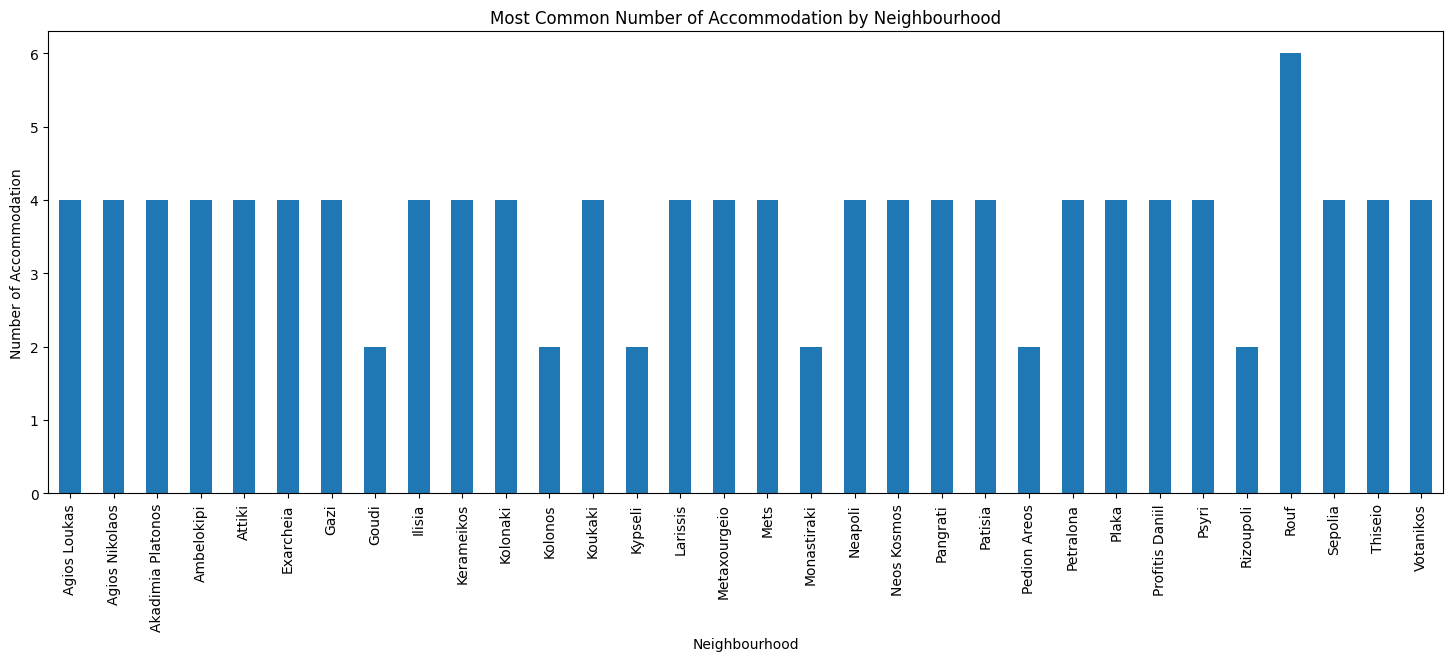

In [60]:
# 2o ερώτημα

hoods = train_2019.copy()
hoods = hoods.groupby('neighbourhood')['accommodates'].apply(lambda x: x.mode()[0])

plt.figure(figsize=(18, 6))
hoods.plot(kind='bar')
plt.title('Most Common Number of Accommodation by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Accommodation')
plt.xticks(rotation=90)
plt.show()

In [66]:
# 3o ερώτημα

hoods = train_2019.copy()
hoods = hoods.groupby('neighbourhood')['review_scores_rating'].mean()
hoods = hoods.sort_values(ascending=False)
hoods = pd.DataFrame(hoods.head(3))
hoods = hoods.reset_index()
hoods

,neighbourhood,review_scores_rating
0,Sepolia,97.081395
1,Kolonos,96.656958
2,Profitis Daniil,96.531250




##    **1.14**



In [73]:
####### febrouary - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/febrouary/listings0.csv"
dfh1 = pd.read_csv(path, encoding='utf-8', engine='python')
dfh1['month'] = 'Febrouary'

####### march - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/march/listings0.csv"
dfh2 = pd.read_csv(path, encoding='utf-8', engine='python')
dfh2['month'] = 'March'
dfh12 = pd.concat([dfh1,dfh2])

####### april - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/april/listings0.csv"
dfh3 = pd.read_csv(path, encoding='utf-8', engine='python')
dfh3['month'] = 'April'
dfh = pd.concat([dfh12, dfh3])

hosts = dfh.copy()
hosts = hosts.groupby('host_id')['id'].nunique()
hosts = hosts.sort_values(ascending=False)
hosts = pd.DataFrame(hosts.head(10))
hosts = hosts.reset_index()
hosts.columns = ['host_id', 'num_host_listings']

hosts

,host_id,num_host_listings
0,77457889,126
1,29927830,96
2,135482892,86
3,748818,80
4,1621474,72
5,1418201,63
6,112527018,57
7,65714690,48
8,2718115,46
9,149346682,45


# **Train_2023**

## **Create the train files**

### Import libraries

In [74]:
# Import libraries
import pandas as pd
import sys
import matplotlib.pyplot as plt

wanted_columns = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood_cleansed',
          'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
          'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'city', 'cancellation_policy',
          'bed_type', 'bathrooms', 'bathrooms_text', 'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365', 'minimum_nights']

### Create the data from listings.csv for every month

In [75]:
####### march - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/march/listings.csv"
df1 = pd.read_csv(path, encoding='utf-8', engine='python')
for column in df1.columns:  # keep only the wanted columns
  if column not in wanted_columns:
    df1.drop(column, axis=1, inplace=True)
df1['month'] = 'march'  # add the month as a column

####### june - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/june/listings.csv"
df2 = pd.read_csv(path, encoding='utf-8', engine='python')
for column in df2.columns:  # keep only the wanted columns
  if column not in wanted_columns:
    df2.drop(column, axis=1, inplace=True)
df2['month'] = 'june'  # add the month as a column
df12 = pd.concat([df1,df2])

####### september - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/september/listings.csv"
df3 = pd.read_csv(path, encoding='utf-8', engine='python')
for column in df3.columns:  # keep only the wanted columns
  if column not in wanted_columns:
    df3.drop(column, axis=1, inplace=True)
df3['month'] = 'september'  # add the month as a column
df = pd.concat([df12,df3])

df

,id,name,description,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,amenities,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,month
0,10595,"3 bedrooms, 2 bathrooms, 2nd floor with elevator",The apartment is 3-bedroom apartment with 2-ba...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,...,"[""Hangers"", ""Wifi"", ""Dishwasher"", ""Dishes and ...",$60.00,1,245,39,2011-05-20,2023-03-17,4.82,t,march
1,571492,"Acropolis Alpha, 4bd4ba, Great Friendly Hosts!","Acropolis Alpha features 4 bedrooms, 4 bathroo...",2012-07-02,100%,t,t,ΓΟΥΒΑ,37.961320,23.739120,...,"[""Hangers"", ""Wifi"", ""Smoke alarm"", ""Books and ...",$526.00,3,320,21,2013-05-08,2022-11-14,4.86,t,march
2,571876,"Vintage Apartment Athens, Plaka (Historic Center)",Ground Floor 50sqm Vintage Style Apartment w/e...,2012-07-03,100%,t,t,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.975380,23.732640,...,"[""Hangers"", ""Wifi"", ""Books and reading materia...",$40.00,3,325,396,2012-10-08,2022-11-21,4.79,t,march
3,572435,"Acropolis Beta, 3 Bdrm, 2 BA Sleep 8 in Real B...","Local living, 3 bedr/2 ba, private veranda<br ...",2012-07-02,100%,t,t,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,37.963020,23.739730,...,"[""Hangers"", ""Wifi"", ""Books and reading materia...",$358.00,3,157,10,2015-04-26,2018-06-30,4.67,t,march
4,10990,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,...,"[""Hangers"", ""Dishes and silverware"", ""Essentia...",$64.00,1,257,64,2012-09-06,2023-02-10,4.79,t,march
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950,981055995149838218,Rental unit in Athina · ★New · 1 bedroom · 1 b...,Χαλαρώστε κάνοντας μια μοναδική και ήρεμη απόδ...,2023-07-28,NaN,t,t,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.982441,23.735211,...,"[""Security cameras on property"", ""Hair dryer"",...",$104.00,1,242,0,NaN,NaN,NaN,t,september
12951,981172247690878612,Rental unit in Athina · ★New · 1 bedroom · 1 b...,A 1 bedroom 3 room apartment in the center of ...,2023-09-15,NaN,f,t,ΚΥΨΕΛΗ,37.997665,23.733036,...,"[""Kitchen"", ""TV"", ""Washer"", ""Dedicated workspa...",$99.00,1,270,0,NaN,NaN,NaN,t,september
12952,981209310562228052,Hotel in Athina · ★New · 1 bedroom · 1 bed · 1...,Everything you want to explore is right outsid...,2019-09-10,82%,t,t,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.986610,23.726890,...,"[""Security cameras on property"", ""TV"", ""Fire e...",$30.00,1,88,0,NaN,NaN,NaN,f,september
12953,981572315765430441,Rental unit in Athina · ★New · 1 bedroom · 1 b...,Enjoy a stylish experience at this centrally-l...,2021-12-04,100%,t,t,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.010320,23.729300,...,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Washer...",$53.00,1,247,0,NaN,NaN,NaN,t,september


In [76]:
# replace bathrooms column with the actual values from bathrooms_text and delete bathrooms_text column
replace = []
for index, row in df.iterrows():
  amount = str(row['bathrooms_text']).split()[0]
  if amount == "Half-bath" or amount == "Private":
    amount = 1
  elif pd.isna(row["bathrooms_text"]):
    amount = -1
  replace.append(amount)

# find average number:
average = 0
count_minus_one = 0
for amount in replace:
  amount = float(amount)
  if amount != -1:
      average += amount
  else:
    count_minus_one += 1
average = round(average / (len(replace) - count_minus_one))

# replace "-1" in "replace" list with "average" and make every number a float
for number in replace:
  if number == -1: number = average
  number = float(number)

# replace bathrooms column with the real values
df['bathrooms'] = replace
del df['bathrooms_text']
df.bathrooms

# rename neighbourhood_cleansed column to neighbourhood
df.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True)

### Find how many NaN values it's column has and save them

In [77]:
nan_col = []
for column in df.columns:
  number = df[column].isnull().sum()
  if number == 0: continue # skip the columns with 0 NaN values
  print(column, ":" ,number)
  nan_col.append((column,number))

name : 1
description : 107
host_since : 7
host_response_rate : 5256
host_has_profile_pic : 7
host_identity_verified : 7
bedrooms : 3701
beds : 328
first_review : 5969
last_review : 5969
review_scores_rating : 5966


### For the columns with a small amount of NaN values, drop those NaN rows

In [78]:
# save the columns with a small amount of NaN values
small_columns = []
for i in nan_col:
  column = i[0]
  amount = i[1]
  if amount <= 1000:
    small_columns.append(column)

# for the columns with a small amount of NaN values, drop those NaN rows
for column in df.columns:
  if column not in small_columns: continue
  df = df.drop(df[df[column].isnull()].index)

### Managing missing data & excessive values

In [79]:
# find how many NaN values it's column has and save them
train = df.copy()
nan_col = []
for column in train.columns:
  number = train[column].isnull().sum()
  if number == 0: continue # skip the columns with 0 NaN values
  print(column, ":" ,number)
  nan_col.append((column,number))

host_response_rate : 5024
bedrooms : 3475
first_review : 5716
last_review : 5716
review_scores_rating : 5713


In [80]:
# Replace NaN values

# for 'host_response_rate' nan values:
not_nan = train[~train['host_response_rate'].isna()]
average = not_nan['host_response_rate'].replace('[\%]', '', regex=True).astype(float)
average = round(average.mean())
average = str(average)
average = average + "%"
train['host_response_rate'] = train['host_response_rate'].fillna(average)

# for 'first_review' and 'last_review' nan values:
train['first_review'] = train['first_review'].fillna("No reviews available")
train['last_review'] = train['last_review'].fillna("No reviews available")

# for 'review_scores_rating' nan values:
not_nan = train[~train['review_scores_rating'].isna()]
average = not_nan['review_scores_rating'].astype(float)
average = round(average.mean(), 0)
average = str(average)
train['review_scores_rating'] = train['review_scores_rating'].fillna(average)

# for 'bedrooms' nan values:
not_nan = train[~train['bedrooms'].isna()]
average = not_nan['bedrooms'].astype(float)
average = round(average.mean(), 0)
train['bedrooms'] = train['bedrooms'].fillna(average)

In [81]:
# Remove rows with excessive values

# for 'bedrooms':
average = train.bedrooms.mean()
excessive = train[train['bedrooms'] >= 10]
train = train.drop(excessive.bedrooms.index)

# for 'bed':
average = train.beds.mean()
excessive = train[train['beds'] >= 15]
train = train.drop(excessive.beds.index)

# for 'bathrooms':

# for i in train.bathrooms: print(i)
average = train.bathrooms.astype(float).mean()
excessive = train[train['bathrooms'].astype(float) >= 7]
train = train.drop(excessive.bathrooms.index)

# for 'accommodates':
average = train.accommodates.mean()
excessive = train[train['accommodates'] > 20]
train = train.drop(excessive.accommodates.index)

# for 'price':
average = train.price.replace('[\$\,\.]', '', regex=True).astype(float) / 100
average = average.mean()
excessive = train[(train.price.replace('[\$\,\.]', '', regex=True).astype(float) / 100) > 1000]
train = train.drop(excessive.price.index)

# for 'minimum_nights':
average = train.minimum_nights.mean()
excessive = train[train['minimum_nights'] > 150]
train = train.drop(excessive.minimum_nights.index)

In [82]:
# show the train dataframe
train

,id,name,description,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,...,amenities,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,month
0,10595,"3 bedrooms, 2 bathrooms, 2nd floor with elevator",The apartment is 3-bedroom apartment with 2-ba...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,...,"[""Hangers"", ""Wifi"", ""Dishwasher"", ""Dishes and ...",$60.00,1,245,39,2011-05-20,2023-03-17,4.82,t,march
1,571492,"Acropolis Alpha, 4bd4ba, Great Friendly Hosts!","Acropolis Alpha features 4 bedrooms, 4 bathroo...",2012-07-02,100%,t,t,ΓΟΥΒΑ,37.961320,23.739120,...,"[""Hangers"", ""Wifi"", ""Smoke alarm"", ""Books and ...",$526.00,3,320,21,2013-05-08,2022-11-14,4.86,t,march
2,571876,"Vintage Apartment Athens, Plaka (Historic Center)",Ground Floor 50sqm Vintage Style Apartment w/e...,2012-07-03,100%,t,t,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.975380,23.732640,...,"[""Hangers"", ""Wifi"", ""Books and reading materia...",$40.00,3,325,396,2012-10-08,2022-11-21,4.79,t,march
3,572435,"Acropolis Beta, 3 Bdrm, 2 BA Sleep 8 in Real B...","Local living, 3 bedr/2 ba, private veranda<br ...",2012-07-02,100%,t,t,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,37.963020,23.739730,...,"[""Hangers"", ""Wifi"", ""Books and reading materia...",$358.00,3,157,10,2015-04-26,2018-06-30,4.67,t,march
4,10990,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,...,"[""Hangers"", ""Dishes and silverware"", ""Essentia...",$64.00,1,257,64,2012-09-06,2023-02-10,4.79,t,march
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950,981055995149838218,Rental unit in Athina · ★New · 1 bedroom · 1 b...,Χαλαρώστε κάνοντας μια μοναδική και ήρεμη απόδ...,2023-07-28,97%,t,t,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.982441,23.735211,...,"[""Security cameras on property"", ""Hair dryer"",...",$104.00,1,242,0,No reviews available,No reviews available,5.0,t,september
12951,981172247690878612,Rental unit in Athina · ★New · 1 bedroom · 1 b...,A 1 bedroom 3 room apartment in the center of ...,2023-09-15,97%,f,t,ΚΥΨΕΛΗ,37.997665,23.733036,...,"[""Kitchen"", ""TV"", ""Washer"", ""Dedicated workspa...",$99.00,1,270,0,No reviews available,No reviews available,5.0,t,september
12952,981209310562228052,Hotel in Athina · ★New · 1 bedroom · 1 bed · 1...,Everything you want to explore is right outsid...,2019-09-10,82%,t,t,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.986610,23.726890,...,"[""Security cameras on property"", ""TV"", ""Fire e...",$30.00,1,88,0,No reviews available,No reviews available,5.0,f,september
12953,981572315765430441,Rental unit in Athina · ★New · 1 bedroom · 1 b...,Enjoy a stylish experience at this centrally-l...,2021-12-04,100%,t,t,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.010320,23.729300,...,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Washer...",$53.00,1,247,0,No reviews available,No reviews available,5.0,t,september


### Create the train file and the dataframe we are going to be using

In [83]:
train.to_csv("train_2023.csv", index=False, encoding='utf-8')

train_2023 = pd.read_csv("/content/train_2023.csv", encoding='utf-8', engine='python')
train_2023

,id,name,description,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,...,amenities,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,month
0,10595,"3 bedrooms, 2 bathrooms, 2nd floor with elevator",The apartment is 3-bedroom apartment with 2-ba...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,...,"[""Hangers"", ""Wifi"", ""Dishwasher"", ""Dishes and ...",$60.00,1,245,39,2011-05-20,2023-03-17,4.82,t,march
1,571492,"Acropolis Alpha, 4bd4ba, Great Friendly Hosts!","Acropolis Alpha features 4 bedrooms, 4 bathroo...",2012-07-02,100%,t,t,ΓΟΥΒΑ,37.961320,23.739120,...,"[""Hangers"", ""Wifi"", ""Smoke alarm"", ""Books and ...",$526.00,3,320,21,2013-05-08,2022-11-14,4.86,t,march
2,571876,"Vintage Apartment Athens, Plaka (Historic Center)",Ground Floor 50sqm Vintage Style Apartment w/e...,2012-07-03,100%,t,t,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.975380,23.732640,...,"[""Hangers"", ""Wifi"", ""Books and reading materia...",$40.00,3,325,396,2012-10-08,2022-11-21,4.79,t,march
3,572435,"Acropolis Beta, 3 Bdrm, 2 BA Sleep 8 in Real B...","Local living, 3 bedr/2 ba, private veranda<br ...",2012-07-02,100%,t,t,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,37.963020,23.739730,...,"[""Hangers"", ""Wifi"", ""Books and reading materia...",$358.00,3,157,10,2015-04-26,2018-06-30,4.67,t,march
4,10990,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,...,"[""Hangers"", ""Dishes and silverware"", ""Essentia...",$64.00,1,257,64,2012-09-06,2023-02-10,4.79,t,march
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34730,981055995149838218,Rental unit in Athina · ★New · 1 bedroom · 1 b...,Χαλαρώστε κάνοντας μια μοναδική και ήρεμη απόδ...,2023-07-28,97%,t,t,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.982441,23.735211,...,"[""Security cameras on property"", ""Hair dryer"",...",$104.00,1,242,0,No reviews available,No reviews available,5.00,t,september
34731,981172247690878612,Rental unit in Athina · ★New · 1 bedroom · 1 b...,A 1 bedroom 3 room apartment in the center of ...,2023-09-15,97%,f,t,ΚΥΨΕΛΗ,37.997665,23.733036,...,"[""Kitchen"", ""TV"", ""Washer"", ""Dedicated workspa...",$99.00,1,270,0,No reviews available,No reviews available,5.00,t,september
34732,981209310562228052,Hotel in Athina · ★New · 1 bedroom · 1 bed · 1...,Everything you want to explore is right outsid...,2019-09-10,82%,t,t,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.986610,23.726890,...,"[""Security cameras on property"", ""TV"", ""Fire e...",$30.00,1,88,0,No reviews available,No reviews available,5.00,f,september
34733,981572315765430441,Rental unit in Athina · ★New · 1 bedroom · 1 b...,Enjoy a stylish experience at this centrally-l...,2021-12-04,100%,t,t,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.010320,23.729300,...,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Washer...",$53.00,1,247,0,No reviews available,No reviews available,5.00,t,september




##    **1.1**



In [84]:
temp = train_2023.copy()

types = {}
for type in temp.room_type:
  if type in types:
    types[type] += 1
  else:
    types[type] = 1

most_common = max(types, key=types.get)
print("Most common room type:", most_common)

Most common room type: Entire home/apt




##    **1.2**



In [85]:
grouped_price = train_2023.copy()

grouped_price['price'] = grouped_price['price'].replace('[\$\,\.]', '', regex=True).astype(float)
grouped_price.price = grouped_price.price/100
grouped_price = grouped_price.groupby('month', sort=False)['price'].mean()
grouped_price

month
march        81.755072
june         98.321615
september    96.053505
Name: price, dtype: float64

<Axes: xlabel='Months', ylabel='Average Price'>

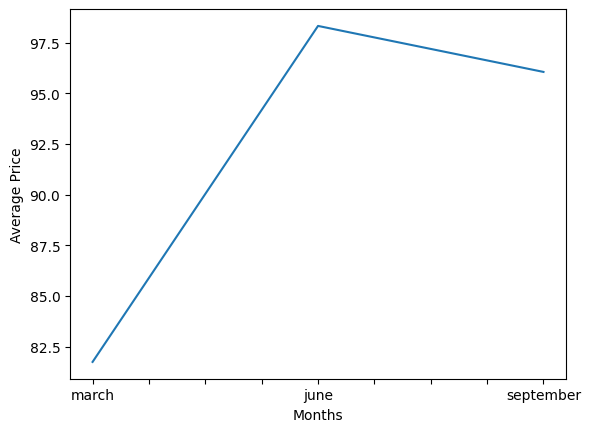

In [86]:
grouped_price.plot(xlabel = 'Months', ylabel = 'Average Price')



##    **1.3**



In [87]:
grouped_neigh = train_2023.copy()
grouped_neigh = grouped_neigh.groupby('neighbourhood')['number_of_reviews'].sum()
grouped_neigh

neighbourhood
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                        6647
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                      3579
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     98810
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                        6073
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                     8527
ΑΚΡΟΠΟΛΗ                             73345
ΑΜΠΕΛΟΚΗΠΟΙ                          40867
ΑΝΩ ΚΥΨΕΛΗ                            8028
ΑΝΩ ΠΑΤΗΣΙΑ                           6448
ΒΟΤΑΝΙΚΟΣ                            12615
ΓΚΑΖΙ                                21499
ΓΚΥΖΗ                                10786
ΓΟΥΒΑ                                 4077
ΓΟΥΔΙ                                16035
ΕΛΛΗΝΟΡΩΣΩΝ                           6497
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              416632
ΖΑΠΠΕΙΟ                              43873
ΘΗΣΕΙΟ                               73161
ΙΛΙΣΙΑ                               17350
ΚΕΡΑΜΕΙΚΟΣ                           53256
ΚΟΛΟΚΥΝΘΟΥ                            2183
ΚΟΛΩΝΑΚΙ                             38562
ΚΟΛΩΝΟΣ                              126

In [88]:
neigh = grouped_neigh.nlargest(5).index
for i in neigh:
  print(i)

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
ΝΕΟΣ ΚΟΣΜΟΣ
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ




##    **1.4**



In [89]:
neigh = train_2023.copy()
neigh = neigh[neigh["room_type"] == 'Entire home/apt']
neigh = neigh.drop_duplicates(subset=['id'])
neigh = neigh.groupby('neighbourhood')['id'].count()
neigh

neighbourhood
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                        59
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                      36
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     770
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                        98
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                     88
ΑΚΡΟΠΟΛΗ                             376
ΑΜΠΕΛΟΚΗΠΟΙ                          459
ΑΝΩ ΚΥΨΕΛΗ                           109
ΑΝΩ ΠΑΤΗΣΙΑ                           68
ΒΟΤΑΝΙΚΟΣ                             77
ΓΚΑΖΙ                                113
ΓΚΥΖΗ                                109
ΓΟΥΒΑ                                 84
ΓΟΥΔΙ                                241
ΕΛΛΗΝΟΡΩΣΩΝ                           73
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2200
ΖΑΠΠΕΙΟ                              167
ΘΗΣΕΙΟ                               365
ΙΛΙΣΙΑ                               216
ΚΕΡΑΜΕΙΚΟΣ                           332
ΚΟΛΟΚΥΝΘΟΥ                            22
ΚΟΛΩΝΑΚΙ                             425
ΚΟΛΩΝΟΣ                              106
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1118
ΚΥ

In [90]:
neigh.idxmax()

'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ'

## **1.5 - 1.6**

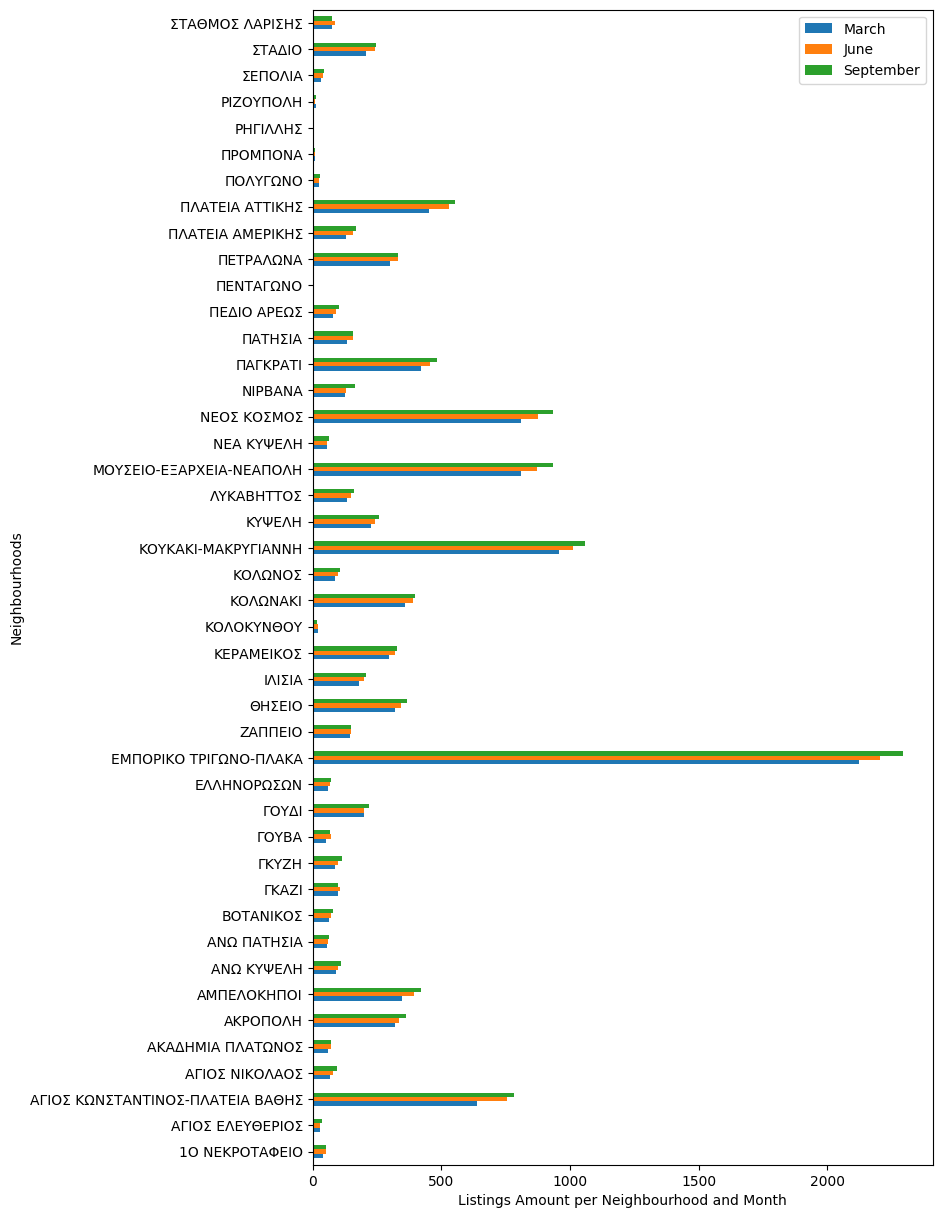

In [91]:
# per month - neighbourhood
month_neigh = train_2023.copy()
month_neigh = month_neigh.groupby(['month', 'neighbourhood'], as_index=False)['id'].count()
month_neigh.columns = ['month', 'neighbourhood', 'count']

# for months amounts
march = []
for index, row in month_neigh.iterrows():
  if row['month'] == "march": march.append(row['count'])

june = []
for index, row in month_neigh.iterrows():
  if row['month'] == "june": june.append(row['count'])

september = []
for index, row in month_neigh.iterrows():
  if row['month'] == "september": september.append(row['count'])

# for index
month_neigh = train_2023.copy()
index =  list(month_neigh.neighbourhood.unique()) # for index
index = sorted(index)

month_neigh_plot = pd.DataFrame({'March': march, 'June': june, 'September': september}, index=index)
mn_plot = month_neigh_plot.plot.barh(figsize=(8, 15), ylabel = 'Neighbourhoods', xlabel = 'Listings Amount per Neighbourhood and Month')



##    **1.7**



In [92]:
neigh = train_2023.copy()
neigh = neigh.drop_duplicates(subset=['id'])
neigh = neigh.groupby('neighbourhood')['room_type'].apply(pd.Series.mode)
neigh = neigh.droplevel(level=1)
neigh

neighbourhood
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                      Entire home/apt
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                    Entire home/apt
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    Entire home/apt
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                      Entire home/apt
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   Entire home/apt
ΑΚΡΟΠΟΛΗ                            Entire home/apt
ΑΜΠΕΛΟΚΗΠΟΙ                         Entire home/apt
ΑΝΩ ΚΥΨΕΛΗ                          Entire home/apt
ΑΝΩ ΠΑΤΗΣΙΑ                         Entire home/apt
ΒΟΤΑΝΙΚΟΣ                           Entire home/apt
ΓΚΑΖΙ                               Entire home/apt
ΓΚΥΖΗ                               Entire home/apt
ΓΟΥΒΑ                               Entire home/apt
ΓΟΥΔΙ                               Entire home/apt
ΕΛΛΗΝΟΡΩΣΩΝ                         Entire home/apt
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              Entire home/apt
ΖΑΠΠΕΙΟ                             Entire home/apt
ΘΗΣΕΙΟ                              Entire home/apt
ΙΛΙΣΙΑ                              Entire home/ap



##    **1.8**



In [93]:
room = train_2023.copy()
room['price'] = room['price'].replace('[\$\,\.]', '', regex=True).astype(float)
room.price = room.price/100
room = room.groupby('room_type')['price'].mean()
room

room_type
Entire home/apt     91.563073
Hotel room         189.890909
Private room        95.067385
Shared room         27.598174
Name: price, dtype: float64

In [94]:
room.idxmax()

'Hotel room'



##    **1.9**



In [95]:
!pip install folium

In [96]:
import folium
from folium import plugins

In [97]:
data = train_2023.copy()
coords = data[['latitude', 'longitude']]

# for 300 random rows, of the coords dataframe
coords = coords.sample(n=300)
coords

,latitude,longitude
15004,37.981540,23.759420
6106,37.977425,23.729094
28798,37.976510,23.729870
21565,37.976282,23.717507
6067,37.967049,23.731310
...,...,...
11500,37.991650,23.722170
12094,37.987970,23.728350
5689,37.957510,23.735530
26961,37.956970,23.730770


In [98]:
map = folium.Map(location=[coords.iloc[0]['latitude'], coords.iloc[0]['longitude']])

for index, row in coords.iterrows():
  value = data.iloc[index, df.columns.get_loc('room_type')]
  folium.Marker(location=[row['latitude'], row['longitude']], popup=f"Room type: {value}").add_to(map)

map



##    **1.10**



In [99]:
from wordcloud import WordCloud

In [102]:
####### march - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/march/reviews.csv"
dfa = pd.read_csv(path, encoding='utf-8', engine='python')
dfa['month'] = 'march'


####### june - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/june/reviews.csv"
dfb = pd.read_csv(path, encoding='utf-8', engine='python')
dfb['month'] = 'june'
dfab = pd.concat([dfa,dfb])


####### september - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/september/reviews.csv"
dfc = pd.read_csv(path, encoding='utf-8', engine='python')
dfc['month'] = 'september'
df_tonos = pd.concat([dfab,dfc])

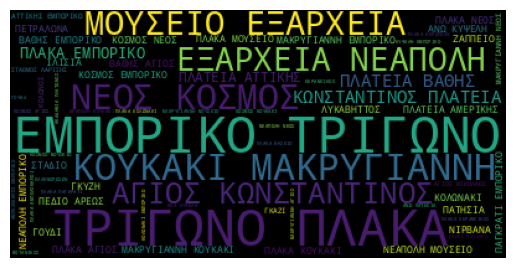

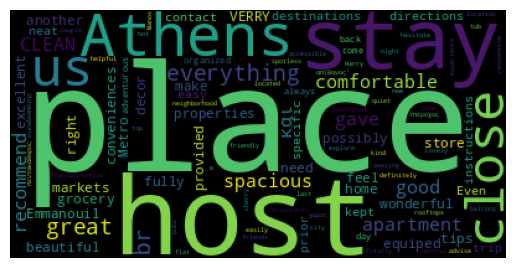

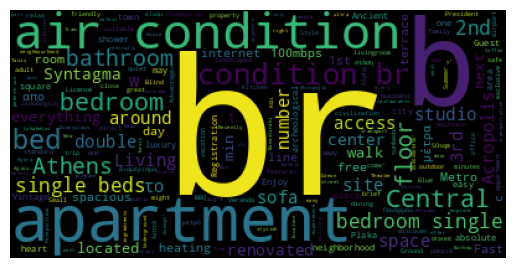

In [103]:
neighbourhood = train_2023.copy()
text = ' '.join(neighbourhood['neighbourhood'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

last_review = df_tonos.copy()
text = last_review['comments'].values
wordcloud2 = WordCloud().generate(str(text))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

description = train_2023.copy()
text = description['description'].values
wordcloud3 = WordCloud().generate(str(text))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()



##    **1.11**



In [104]:
# find each individual value of the amenities column
am = train_2023.copy()
values = am.amenities.copy()
values = values.replace('[\{\}\"]','', regex=True).astype(str)
values

amen = pd.DataFrame(values)
rows = amen.explode('amenities')
rows = rows['amenities'].str.strip("{}")
rows = rows.str.split(",")

ind_values = []
for row in rows:
  for item in row:
    if item not in ind_values:
      ind_values.append(item)

for i in ind_values:
  print(i)

[Hangers
 Wifi
 Dishwasher
 Dishes and silverware
 Essentials
 Electric stove
 Shampoo
 Hot water
 Ethernet connection
 AC - split type ductless system
 Single level home
 Crib
 Shower gel
 Free street parking
 Microwave
 Hair dryer
 Iron
 Extra pillows and blankets
 Cooking basics
 Laundromat nearby
 Pack \u2019n play/Travel crib
 Bed linens
 Oven
 Private patio or balcony
 Kitchen
 Central heating
 Free washer \u2013 In unit
 Refrigerator
 Coffee maker
 Keypad
 High chair
 43\ HDTV
 Self check-in]
 Smoke alarm
 Books and reading material
 Room-darkening shades
 City skyline view
 Barbecue utensils
 TV
 Coffee
 BBQ grill
 Stove
 Host greets you
 Ceiling fan
 Safe
 Free dryer \u2013 In unit
 Freezer
 Fire extinguisher
 Air conditioning
 Dining table
 Heating
 Body soap
 Dedicated workspace
 Mini fridge
 Clothing storage
 Hot water kettle
 Indoor fireplace
 Private entrance
 Toaster
 Baking sheet
 Board games
 Luggage dropoff allowed
 Blender
 Elevator
 Bathtub]
 Wine glasses
 Clothing 

In [106]:
# Make the amenities categoties

# amenities categoties: kitchen, accesibility, electricity_and_technology, facilities, bathroom, kids_friendly, security, services
kitchen = ["kitchen", "microwave", "refrigerator", "dishwasher", "dishes", "cooking", "oven", "stove", "Hot water kettle", "fridge",
           "espresso", "dining", "kitchenette", "wine", "freezer", "glasses", "coffee", "toaster", "blender", "baking", "rice", "bread", "french press", "olive oil"]
accesibility = ["elevator", "step-free access", "clearance", "accessible-height", "path",
                "entryway", "wheelchair", "single level home", "grab bars", "bath chair", "shower chair", "access"]
electricity_and_technology = ["tv", "internet", "air conditioning", "buzzer/wireless intercom", "hair dryer", "ethernet connection", "game console", "dvd player", "ev charger", "keypad", "smart lock", "smart tv",
                              "sound system", "computer", "monitor", "printer", "fax", "screen", "air purifier", "amazon echo", "drawer", "heat lamps", "ironing Board", "electric",
                              "laptop", "iron", "ac", "wifi", "cable", "record player", "nintendo", "ps", "chromecast", "pioneer", "finlux", "kenwood", "sony", "technics", "arielli ars-121ln"]
facilities = ["heating", "washer", "dryer", "hangers", "bed", "pillows", "high chair", "room-darkening shades", "doorway", "other",
              "fireplace", "bbq grill", "private", "garden", "backyard", "fire pit", "bedroom comforts", "beach essentials", "changing table", "mattress", "terrace",
              "outdoor seating", "pool", "mudroom", "beachfront", "valet", "waterfront", "heated floors", "fan",
              "sun loungers", "view", "hammock", "sauna", "hot water", "balcony", "heater", "clothing", "furniture", "table", "portable", "workspace", "piano", "mosquito", "dresser", "wardrobe", "closet",
              "rooftop", "wood-burning"]
bathroom = ["shampoo", "bathtub", "soap", "towel", "toilet", "shower", "bathroom", "tub", "bidet", "dove",
            "touchless faucets", "water", "conditioner", "elvive", "apivita", "korres", "johnson's", "sink", "bath",
            "badedas", "pantene", "aveda", "olivia from abea", "palette", "argan source", "papoutsanis", "seife und duschgel"]
kids_pets_friendly = ["family/kid friendly", "toys", "pets allowed", "pets live", "dog(s)", "cat(s)", "children", "baby", "outlet covers",
                      "table corner guards", "pet", "crib", "games", "years old"]
security = ["first aid", "safety card", "fire extinguisher", "detector", "lock", "stair gates", "guards", "alarm", "safe", "security", "cameras"]
services = ["essentials", "24-hour", "luggage dropoff allowed", "host greets you", "long term stays allowed", "breakfast", "parking", "cleaning", "smoking allowed", "check-in",
            "doorman", "building staff", "suitable for events", "gym", "mountain view", "exercise equipment", "ski-in/ski-out", "netflix", "hbo go", "lake access", "disney+", "video", "books", "nearby", "barbecue", "yoga",
            "hbo", "bike", "kayak", "treadmil", "24 hour", "weights", "gas", "hours", "roku", "heated", "hulu", "garage", "boat", "zara", "carport", "infinity"]

# function to find in which category an item belongs
def in_category(item):
  item = item.lower()
  for word in kitchen:
    if word in item: return "kitchen"
  for word in accesibility:
    if word in item: return "accesibility"
  for word in electricity_and_technology:
    if word in item: return "electricity_and_technology"
  for word in facilities:
    if word in item: return "facilities"
  for word in bathroom:
    if word in item: return "bathroom"
  for word in kids_pets_friendly:
    if word in item: return "kids_pets_friendly"
  for word in security:
    if word in item: return "security"
  for word in services:
    if word in item: return "services"
  return "no category"

In [107]:
# replace the various amenities values with the categories
am = train_2023.copy()
for index, row in am.iterrows():
  temp_string = ""
  temp_row = row['amenities']
  temp_row = temp_row.replace("[", "").replace("]", "").replace('"','')
  temp_row = temp_row.split(",")
  for item in temp_row:
    item = item.strip()
    category = in_category(item)
    if category == "no category": print(item)    # for debugging purposes
    else:
      if category not in temp_string:
        if temp_string == "": temp_string = category
        else: temp_string += ", " + category
  train_2023.loc[index, 'amenities'] = temp_string
































\u03bc\u03b1\u03bb\u03b1\u03ba\u03c4\u03b9\u03ba\u03ae \u03ba\u03c1\u03ad\u03bc\u03b1 \u03bc\u03b1\u03bb\u03bb\u03b9\u03ce\u03bd
\u03b1\u03c6\u03c1\u03cc\u03bb\u03bf\u03c5\u03c4\u03c1\u03bf



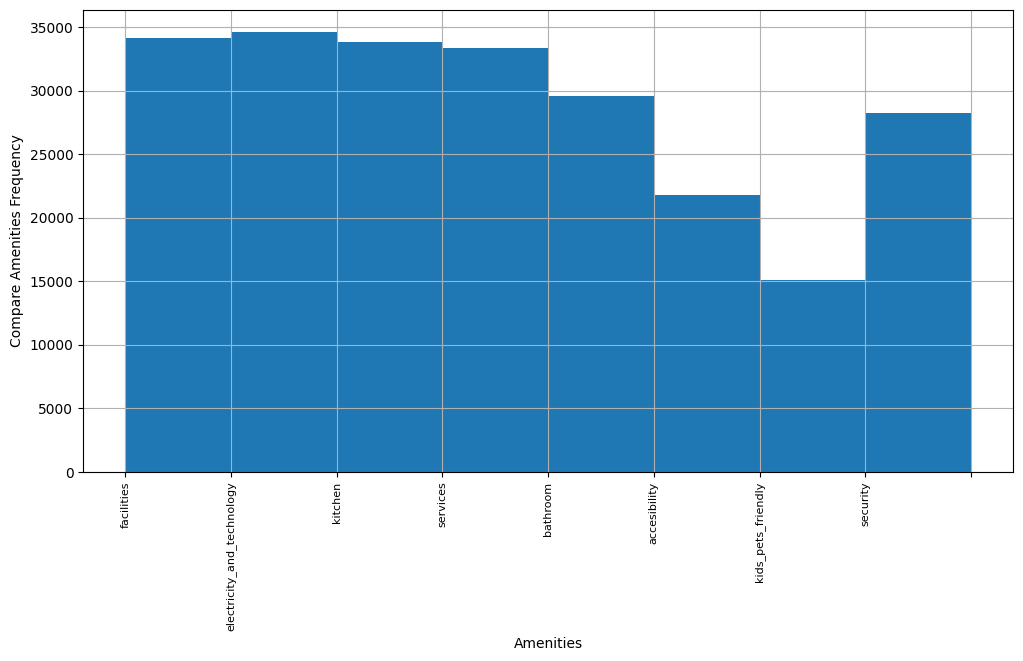

In [108]:
# make the histogram out of the amenities column
ameni = train_2023.copy()
ameni.amenities = ameni.amenities.str.split(",")

for i in range(len(ameni.amenities)):
  for j in range(len(ameni.amenities[i])):
    ameni.amenities[i][j] = ameni.amenities[i][j].strip()

ameni = ameni.explode('amenities')
plt.figure(figsize=(12, 6))
ameni.amenities.hist(bins=8)  # numbers of different categories = 8
plt.gca()
plt.xlabel('Amenities', fontsize=10)
plt.ylabel('Compare Amenities Frequency', fontsize=10)
plt.xticks(fontsize=8, rotation=90)
plt.show()



##    **1.12**



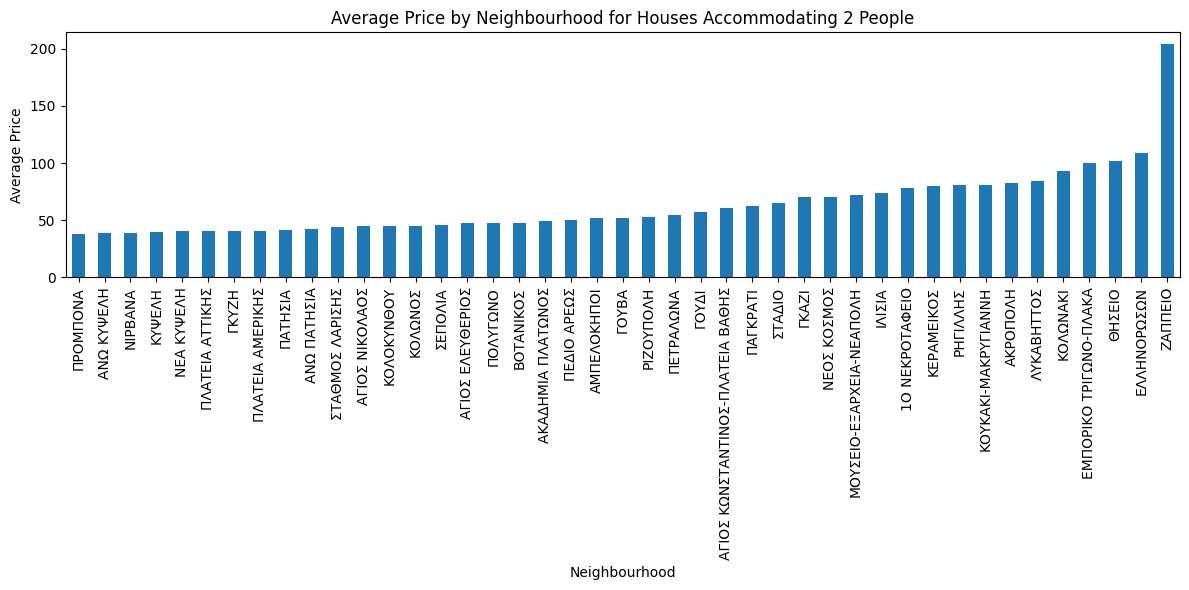

,average_price,category
neighbourhood,,
ΠΡΟΜΠΟΝΑ,37.700000,affordable
ΑΝΩ ΚΥΨΕΛΗ,38.504762,affordable
ΝΙΡΒΑΝΑ,38.762590,affordable
ΚΥΨΕΛΗ,39.321569,affordable
ΝΕΑ ΚΥΨΕΛΗ,40.787879,affordable
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,40.790043,affordable
ΓΚΥΖΗ,40.883333,affordable
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,40.954198,affordable
ΠΑΤΗΣΙΑ,41.449275,affordable


In [109]:
hoods = train_2023.copy()
hoods = hoods[hoods['accommodates'] == 2]
hoods['price'] = hoods['price'].replace('[\$\,\.]', '', regex=True).astype(float)
hoods.price = hoods.price/100
hoods = hoods.groupby('neighbourhood')['price'].mean()
hoods = hoods.sort_values()

plt.figure(figsize=(12, 6))
hoods.plot(kind='bar')
plt.title('Average Price by Neighbourhood for Houses Accommodating 2 People')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

def assign_category(avg_price):
  if avg_price < 42: return 'affordable'
  elif avg_price < 90: return 'medium'
  else: return 'very expensive'

category = hoods.apply(assign_category)

hoods = pd.DataFrame(hoods)
hoods['category'] = category
hoods.columns = ['average_price', 'category']
hoods

##    **1.13**

In [ ]:
# 1o ερώτημα -> κατάταξη των πιο συχνών κατηγοριών amenities
# 2o ερώτημα -> πιο συχνό accomodation number ανά neighbourhood
# 3ο ερώτημα -> top 3, των περιοχών, με τα πιο καλά reviews

In [110]:
# 1o ερώτημα

# find amenities groups
amen = train_2023.copy()
amen = amen['amenities']
values = amen.values
amenities = {}
for row in values:
  row = row.split(",")
  for item in row:
    item = item.strip()
    if item == "": continue
    elif item not in amenities:
      amenities[item] = 1
    else:
      amenities[item] += 1

# make the ordering
amenities_copy = amenities.copy()
most_common_categories = []
amount = []
while amenities_copy:
  temp_amen = max(amenities_copy, key=amenities_copy.get)
  most_common_categories.append(temp_amen)
  amount.append(amenities[temp_amen])
  del amenities_copy[temp_amen]

data = {'most_common_categories': most_common_categories, 'amount': amount}
amenities_df = pd.DataFrame(data)
amenities_df



,most_common_categories,amount
0,electricity_and_technology,34618
1,facilities,34123
2,kitchen,33849
3,services,33330
4,bathroom,29578
5,security,28233
6,accesibility,21803
7,kids_pets_friendly,15096


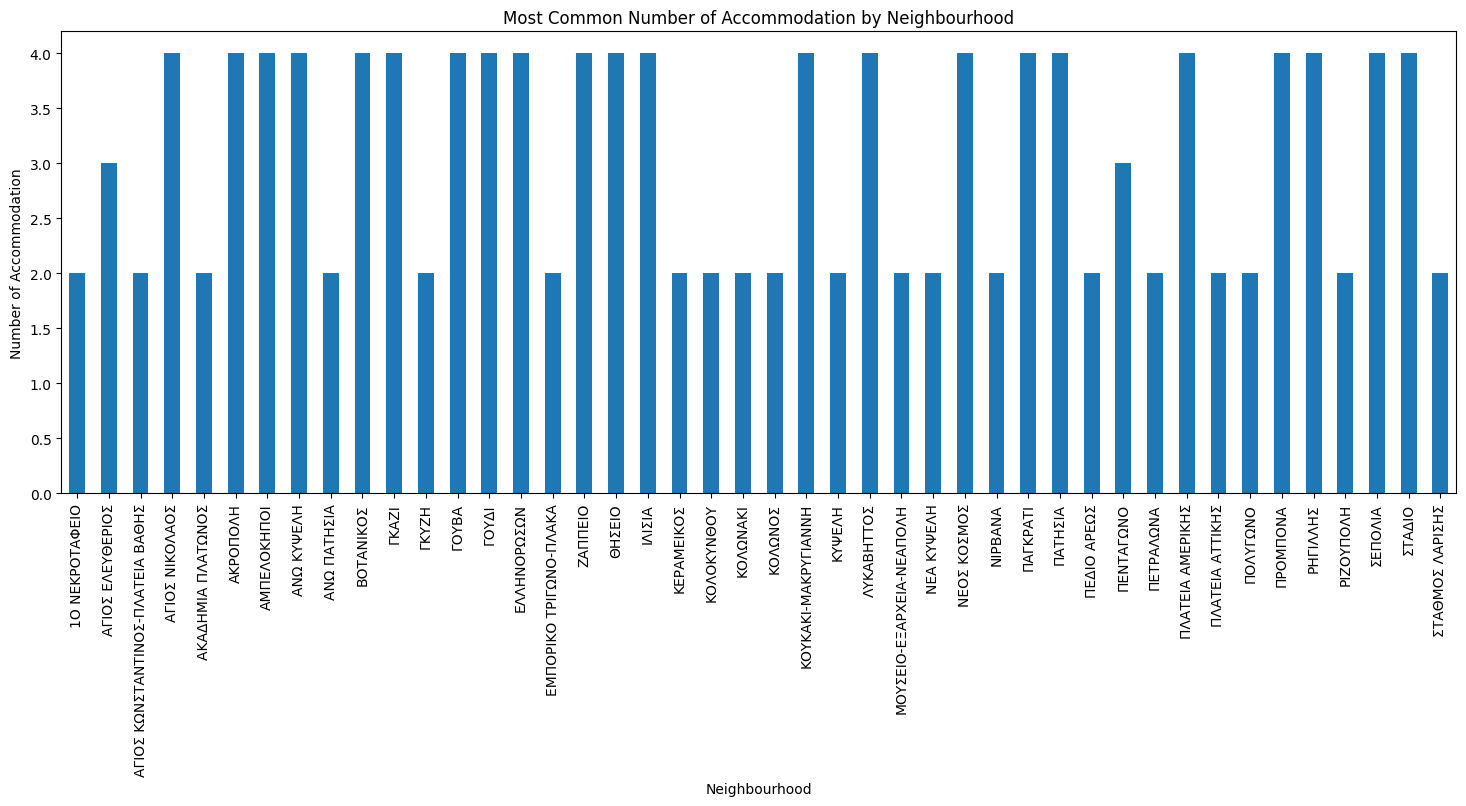

In [111]:
# 2o ερώτημα

hoods = train_2023.copy()
hoods = hoods.groupby('neighbourhood')['accommodates'].apply(lambda x: x.mode()[0])

plt.figure(figsize=(18, 6))
hoods.plot(kind='bar')
plt.title('Most Common Number of Accommodation by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Accommodation')
plt.xticks(rotation=90)
plt.show()

In [114]:
# 3o ερώτημα

hoods = train_2023.copy()
hoods = hoods.groupby('neighbourhood')['review_scores_rating'].mean()
hoods = hoods.sort_values(ascending=False)
hoods = pd.DataFrame(hoods.head(3))
hoods = hoods.reset_index()
hoods.columns = ['neighbourhood', 'review scores rating']
hoods

,neighbourhood,review scores rating
0,ΠΟΛΥΓΩΝΟ,4.904079
1,ΕΛΛΗΝΟΡΩΣΩΝ,4.856447
2,ΖΑΠΠΕΙΟ,4.848939




##    **1.14**



In [115]:
####### march - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/march/listings0.csv"
dfh1 = pd.read_csv(path, encoding='utf-8', engine='python')
dfh1['month'] = 'March'

####### june - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/june/listings0.csv"
dfh2 = pd.read_csv(path, encoding='utf-8', engine='python')
dfh2['month'] = 'June'
dfh12 = pd.concat([dfh1,dfh2])

####### september - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/september/listings0.csv"
dfh3 = pd.read_csv(path, encoding='utf-8', engine='python')
dfh3['month'] = 'September'
dfh = pd.concat([dfh12, dfh3])

hosts = dfh.copy()
hosts = hosts.groupby('host_id')['id'].nunique()
hosts = hosts.sort_values(ascending=False)
hosts = pd.DataFrame(hosts.head(10))
hosts = hosts.reset_index()
hosts.columns = ['host_id', 'num_host_listings']

hosts

,host_id,num_host_listings
0,20104194,113
1,29927830,113
2,90390850,85
3,748818,75
4,113548208,73
5,182156346,59
6,2089542,59
7,113353393,56
8,47267002,56
9,112527018,53


# **1.15**

*   Μεταξύ των δύο χρονιών, οι γειτονιές είναι πολύ παρόμοιες.
*   Παρ' όλ' αυτά, το 2023 υπάρχουν περισσότερες γειτονιές καταγεγραμμένες.
*   Από τα αποτελέσματα του ερωτήματος 1.12, είναι φανερό ότι οι τιμές έχουν αυξηθεί.
*   Οι 5 πιο ακριβές γειτονιές για το 2019, ήταν οι:
  1.   Monastiraki	81.413793
  2.   Plaka	73.852857
  3.   Profitis Daniil	70.000000
  4.   Thiseio	54.434783
  5.   Psyri	65.490506

*   Οι 5 πιο ακριβές γειτονιές για το 2023, ήταν οι:
  1.   ΖΑΠΠΕΙΟ	204.235294
  2.   ΕΛΛΗΝΟΡΩΣΩΝ	109.120000
  3.   ΘΗΣΕΙΟ	101.656904
  4.   ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ	99.752644
  5.   ΚΟΛΩΝΑΚΙ	92.800926
*   Οι γειτονιές που παρέμειναν στις 5 πιο ακριβές από το 2019 στο 2023, είναι οι:
  *   «Plaka»
  *   «Thiseio»
  *   Επίσης, οι περιοχές «Monastiraki» και «Psyri» ανοίκουν στο «ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ» της Αθήνας άρα μαζί με την «Plaka» είναι στη θέση 4 για τη χρονιά 2023








# **Ερώτημα 2ο**

##   **2019**



### **Create the df2019 dataframe**

In [116]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wanted_columns = ['id', 'name', 'description']

In [117]:
# for 2019

####### febrouary - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/febrouary/listings.csv"
df1 = pd.read_csv(path, encoding='utf-8', engine='python')
for column in df1.columns:  # keep only the wanted columns
  if column not in wanted_columns:
    df1.drop(column, axis=1, inplace=True)

####### march - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/march/listings.csv"
df2 = pd.read_csv(path, encoding='utf-8', engine='python')
for column in df2.columns:  # keep only the wanted columns
  if column not in wanted_columns:
    df2.drop(column, axis=1, inplace=True)
df12 = pd.concat([df1,df2])

####### april - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/april/listings.csv"
df3 = pd.read_csv(path, encoding='utf-8', engine='python')
for column in df3.columns:  # keep only the wanted columns
  if column not in wanted_columns:
    df3.drop(column, axis=1, inplace=True)
t2019 = pd.concat([df12,df3])

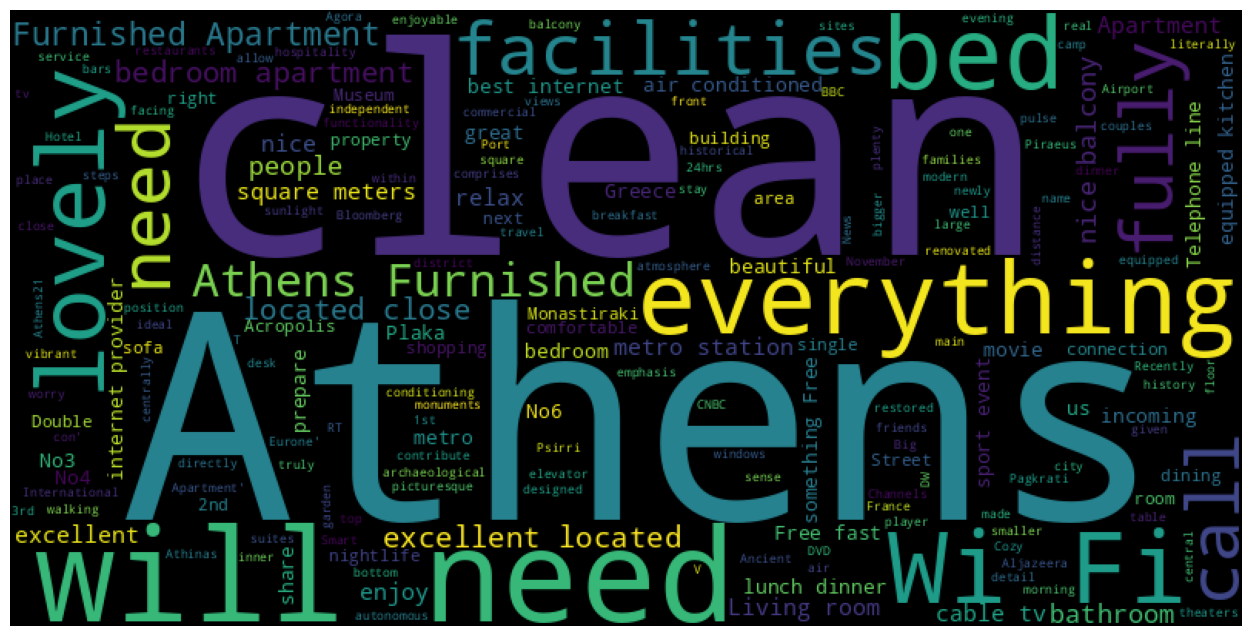

In [118]:
stwd = set(STOPWORDS)
text = t2019['description'].values
plt.figure(figsize=(16, 8))
wordcloud = WordCloud(stopwords = stwd, width = 800, height = 400).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [119]:
df2019 = t2019.copy()
df2019['name_description'] = df2019['name'] + ' ||||||| ' + df2019['description']
df2019 = df2019.drop('name', axis=1)
df2019 = df2019.drop('description', axis=1)
df2019 = df2019.fillna('NULL')

### **2.1**

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
df2019_sample = df2019.sample(n=round(len(df2019)*0.05))
df2019_filtered = df2019_sample.drop_duplicates(subset='id',keep='last').reset_index(drop=True)

In [122]:
# unigrams
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 1))
tfidfMatrix = vectorizer.fit_transform(df2019_filtered['name_description'])
tfidf_uni = pd.DataFrame(tfidfMatrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_uni.insert(0, 'listing_id', df2019_filtered['id'])
tfidf_uni

,listing_id,00,000,00am,00km,00m,00pm,01,02,036,...,집안이,채광은,통해,퍼져,편리한,편리합니다,한식이,한인,항상,힐튼
0,13212332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27914197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27944095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32929381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15025467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,29078983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1342,16460716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1343,13311384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1344,15909226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# bigrams
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(2, 2))
tfidfMatrix = vectorizer.fit_transform(df2019_filtered['name_description'])
tfidf_bi = pd.DataFrame(tfidfMatrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_bi.insert(0, 'listing_id', df2019_filtered['id'])
tfidf_bi

,listing_id,00 00,00 07,00 17,00 21,00 22,00 23,00 accompanied,00 anatomic,00 beautiful,...,집안이 밝습니다,채광은 일출과,통해 공항에,퍼져 항상,편리한 곳이며,편리합니다 우리,한식이 매일,한인 민박,항상 집안이,힐튼 옆에있는
0,13212332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27914197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27944095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32929381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15025467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,29078983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1342,16460716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1343,13311384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1344,15909226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **2.2**

In [124]:
from sklearn.metrics.pairwise import cosine_similarity

In [125]:
cs = cosine_similarity(tfidf_uni)

In [126]:
cs_df = pd.DataFrame(cs, index=tfidf_uni.listing_id, columns=tfidf_uni.listing_id)
cs_df

listing_id,13212332,27914197,27944095,32929381,15025467,26129926,6576594,24621023,24192572,30520455,...,28515340,19156916,19991842,2306865,12103939,29078983,16460716,13311384,15909226,29106978
listing_id,,,,,,,,,,,,,,,,,,,,,
13212332,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
27914197,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
27944095,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
32929381,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
15025467,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29078983,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16460716,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
13311384,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [127]:
N = 100
Nlargest = {}
for index, row in cs_df.iterrows():
  for col_index, value in row.items():
    if index == col_index: continue
    elif len(Nlargest) < 100:
      Nlargest[(index, col_index)] = value
    else:
      min_key = min(Nlargest, key=Nlargest.get)
      min_value = Nlargest[min_key]
      if value > min_value:
        del Nlargest[min_key]
        Nlargest[(index, col_index)] = min_value

In [128]:
# the dictionary with the 100 most similar properties
print(Nlargest)

{(13212332, 27914197): 0.9999999999999971, (13212332, 27944095): 0.9999999999999971, (13212332, 32929381): 0.9999999999999971, (13212332, 15025467): 0.9999999999999954, (13212332, 26129926): 0.999999999999997, (13212332, 6576594): 0.9999999999999858, (13212332, 24621023): 0.999999999999997, (13212332, 24192572): 0.9999999999999976, (13212332, 30520455): 0.9999999999999971, (13212332, 5666577): 0.9999999999999818, (13212332, 29536031): 0.9999999999999971, (13212332, 1137772): 0.9999999999996148, (13212332, 26299264): 0.9999999999999971, (13212332, 31230830): 0.9999999999999971, (13212332, 26612151): 0.9999999999999971, (13212332, 10503859): 0.9999999999999928, (13212332, 631150): 0.9999999999987449, (13212332, 19676528): 0.9999999999999967, (13212332, 12911092): 0.9999999999999954, (13212332, 32538702): 0.9999999999999969, (13212332, 21677507): 0.9999999999999966, (13212332, 31066513): 0.9999999999999971, (13212332, 28889428): 0.9999999999999973, (13212332, 4499304): 0.9999999999999737,

### **2.3**

In [129]:
# print the most similar properties, with their info
def print_properties_info(similar):
  print("Recommending 5 listings similar to Studio")
  print("---------------------------------------------------------")
  for id in similar.keys():
    name_desc = df2019.loc[df2019['id'] == id, 'name_description'].iloc[-1]
    name = name_desc.partition(" ||||||| ")[0]
    description = name_desc.partition(" ||||||| ")[2]
    score = similar[id]
    print("Recommended:", name)
    print("Description:", description)
    print("(score: {})".format(score), "\n\n")

# find the N=num most similar properties to the one with item_id and print them, with their info
def recommend(item_id, num):
  similar = {}
  for index, row in cs_df.iterrows():
    if item_id == index: continue
    value = row[item_id]
    if len(similar) < num:
      similar[index] = value
    else:
      min_key = min(similar, key=similar.get)
      min_value = similar[min_key]
      if value > min_value:
        del similar[min_key]
        similar[index] = min_value

  print_properties_info(similar)
  return list(similar.keys())

In [130]:
# use example for the recommend() function
from random import choice

id_list = cs_df.index.tolist()
selected_id = choice(id_list)
similar = recommend(selected_id, 10)

Recommending 5 listings similar to Studio
---------------------------------------------------------
Recommended: Beatiful apartment in the centre of Athens
Description: Beatiful apartment in the centre of Athens. With an amazing view in the fifth floor
(score: 0.9999999999999971) 


Recommended: Lovely, renovated apartment in the heart of Athens
Description: Top comfort studio in the heart of Athens. Located in Hilton area, Pagrati)   Ideal for visitors who want to explore the city,visit the monuments  of historical interest and experience Athens downtown center.  Perfect for a couple with kids or a single traveler. Ideal for conference attendants Only 2minutes walk from Evangelismos metro station, with direct connection to National airport and to Monastiraki.  Nearby you can find coffee shops, restaurants, tavernas , banks  and supermarkets. This lovely studio-apartment is fully renovated with a double, queen size comfortable bed, good internet connection, tv flat screen and a kitchen

### **2.4**

In [131]:
!pip install nltk
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [141]:
import re

single_string = ' '.join(df2019_filtered['name_description'].tolist())
single_string = single_string.lower()
stop_words = stopwords.words('english')
tokens = []
for word in nltk.word_tokenize(single_string):
  if word not in stop_words:
    word = re.sub('[\.\,\/\•\'\=\!\@\#\$\%\^\&\*\(\)\?\{\}\`\~\+\_]', '', word)
    word = re.sub('[-]', ' ', word)
    if len(word) != 1 and word.isnumeric() == False and not re.search(r'\d', word):
      tokens.append(word)

BigrFinder = BigramCollocationFinder.from_words(tokens)
best = BigrFinder.nbest(nltk.collocations.BigramAssocMeasures.pmi, 10)

In [142]:
best

[(' bathroom ', 'bubble'),
 (' completely', 'private '),
 (' extra', 'camping'),
 (' fridge', ' electric'),
 (' kato', 'patisia '),
 (' kitchenette', ' hob'),
 (' literally', 'everything '),
 (' near', 'acropolis '),
 (' same', 'level '),
 (' usb', 'charger')]